# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Luqman Hakim
- Email: luqmanxhakim22042002@gmail.com 
- Id Dicoding: 2608610

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import joblib

### Menyiapkan data yang akan diguankan

In [3]:
df = pd.read_csv("employee_data.csv", encoding='windows-1252')

## Data Understanding

In [4]:
df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.dtypes

EmployeeId                    int64
Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [7]:
df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


In [8]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

## Data Preparation / Preprocessing

### Handling Missing Value

In [11]:
df['Attrition'] = df['Attrition'].fillna(df['Attrition'].value_counts().idxmax())

In [12]:
df.isna().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Feature Engineering

In [13]:
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']
df['PerfSatIndex'] = df[satisfaction_cols].apply(lambda row: sum(row) / len(row), axis=1)

df.drop(columns=satisfaction_cols, inplace=True)

In [14]:
print(df.columns.tolist())

['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerfSatIndex']


In [15]:
def categorize_satisfaction(val):
    val = float(val)
    match val:
        case _ if 1.0 <= val < 2.0: return 'Low'
        case _ if 2.0 <= val < 3.0: return 'Medium'
        case _ if 3.0 <= val < 4.0: return 'High'
        case _: return 'Very High'

df['PerfSatIndex'] = df['PerfSatIndex'].map(categorize_satisfaction)

In [16]:
df['ExperienceBeforeJob'] = df['TotalWorkingYears'] - df['YearsAtCompany']
df.drop(columns=['TotalWorkingYears', 'YearsAtCompany'], inplace=True)

In [17]:
print(df.columns.tolist())

['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerfSatIndex', 'ExperienceBeforeJob']


In [18]:
def label_experience(x):
    match x:
        case x if 0 <= x <= 5: return 'Junior'
        case x if 6 <= x <= 10: return 'Mid-level'
        case x if 11 <= x <= 20: return 'Senior'
        case x if 21 <= x <= 30: return 'Expert'
        case _: return 'Veteran'

df['ExperienceBeforeJob'] = df['ExperienceBeforeJob'].map(label_experience)


In [19]:
engagement_factors = ['JobInvolvement', 'PerformanceRating', 'WorkLifeBalance']
df['EngagementScore'] = df[engagement_factors].mean(axis=1)

df.drop(columns=engagement_factors, inplace=True)


In [20]:
print(df.columns.tolist())

['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'Gender', 'HourlyRate', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerfSatIndex', 'ExperienceBeforeJob', 'EngagementScore']


In [21]:
def categorize_engagement(val):
    val = float(val)
    match val:
        case v if 1.0 <= v < 2.0: return 'Bad'
        case v if 2.0 <= v < 3.0: return 'Good'
        case v if 3.0 <= v < 4.0: return 'Better'
        case _: return 'Best'

df['EngagementScore'] = df['EngagementScore'].map(categorize_engagement)


In [22]:
def classify_distance(km):
    km = int(km)
    match km:
        case d if 1 <= d <= 10: return 'Short Distance'
        case d if 11 <= d <= 20: return 'Medium Distance'
        case _: return 'Long Distance'

df['HomeDistanceLabel'] = df['DistanceFromHome'].map(classify_distance)
df.drop(columns=['DistanceFromHome'], inplace=True)


In [23]:
def assign_generation(usia):
    usia = int(usia)
    match usia:
        case u if 61 <= u <= 70: return 'Baby Boomers'
        case u if 51 <= u <= 60: return 'Gen X'
        case u if 41 <= u <= 50: return 'Gen Y'
        case u if 31 <= u <= 40: return 'Millennials'
        case _: return 'Gen Z'

df['GenerationGroup'] = df['Age'].map(assign_generation)
df.drop(columns=['Age'], inplace=True)


In [24]:
edu_labels = {
    1: 'Non-Degree',
    2: 'Diploma',
    3: 'S1',
    4: 'S2',
    5: 'S3'
}
df['Education'] = df['Education'].replace(edu_labels)

level_titles = {
    1: 'Entry Level',
    2: 'Asisten Supervisor',
    3: 'Supervisor',
    4: 'Asisten Manager',
    5: 'Manager'
}
df['JobLevel'] = df['JobLevel'].replace(level_titles)


In [25]:
irrelevant_cols = ['StandardHours', 'EmployeeCount', 'Over18']
df.drop(columns=irrelevant_cols, inplace=True)

df = df[sorted(df.columns)]

df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                1470 non-null   float64
 1   BusinessTravel           1470 non-null   object 
 2   DailyRate                1470 non-null   int64  
 3   Department               1470 non-null   object 
 4   Education                1470 non-null   object 
 5   EducationField           1470 non-null   object 
 6   EmployeeId               1470 non-null   int64  
 7   EngagementScore          1470 non-null   object 
 8   ExperienceBeforeJob      1470 non-null   object 
 9   Gender                   1470 non-null   object 
 10  GenerationGroup          1470 non-null   object 
 11  HomeDistanceLabel        1470 non-null   object 
 12  HourlyRate               1470 non-null   int64  
 13  JobLevel                 1470 non-null   object 
 14  JobRole                 

In [26]:
print(df.columns.tolist())

['Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'Education', 'EducationField', 'EmployeeId', 'EngagementScore', 'ExperienceBeforeJob', 'Gender', 'GenerationGroup', 'HomeDistanceLabel', 'HourlyRate', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerfSatIndex', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### Exploratory Data Analysis (EDA)

In [29]:
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df['Attrition'].value_counts()

Attrition
0    1291
1     179
Name: count, dtype: int64

In [30]:
with open('employee_refined.csv', mode='w', newline='', encoding='utf-8') as file:
    df.to_csv(file, index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\1245104497.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=labels, palette=['#ffb6c1', '#add8e6'])


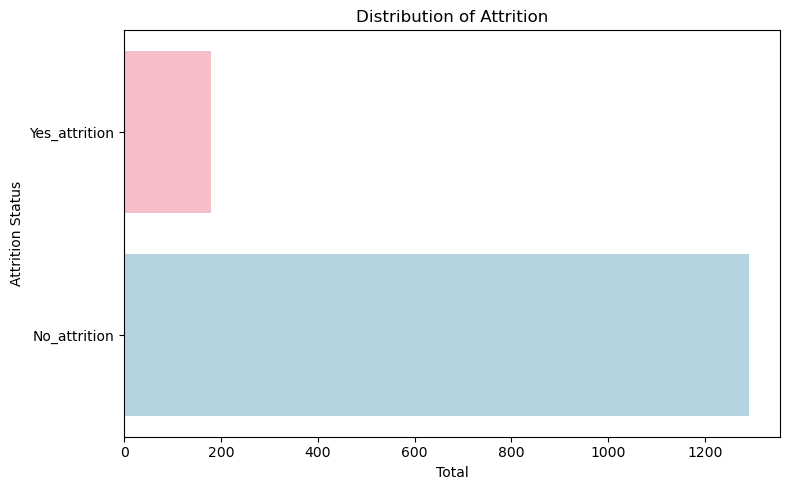

In [31]:
from collections import Counter

attrition_counts = Counter(df['Attrition'])

labels = ['Yes_attrition', 'No_attrition']
values = [attrition_counts[1], attrition_counts[0]]

plt.figure(figsize=(8, 5))
sns.barplot(x=values, y=labels, palette=['#ffb6c1', '#add8e6'])

plt.title('Distribution of Attrition')
plt.xlabel('Total')
plt.ylabel('Attrition Status')
plt.tight_layout()
plt.show()


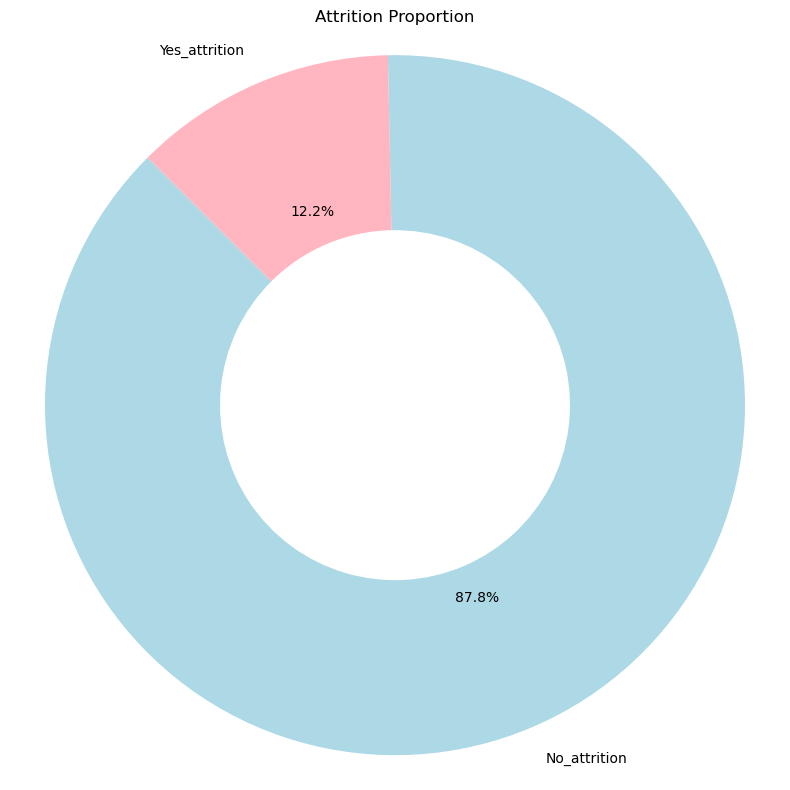

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))

dist = df['Attrition'].value_counts(normalize=True)
labels = ['No_attrition', 'Yes_attrition'] if 0 in dist.index else dist.index.tolist()
sizes = dist.values * 100 
colors = ['#add8e6', '#ffb6c1']  

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=135,
    wedgeprops=dict(width=0.5),
    textprops=dict(color="black")
)

ax.set_title('Attrition Proportion')
ax.axis('equal')  
plt.tight_layout()
plt.show()


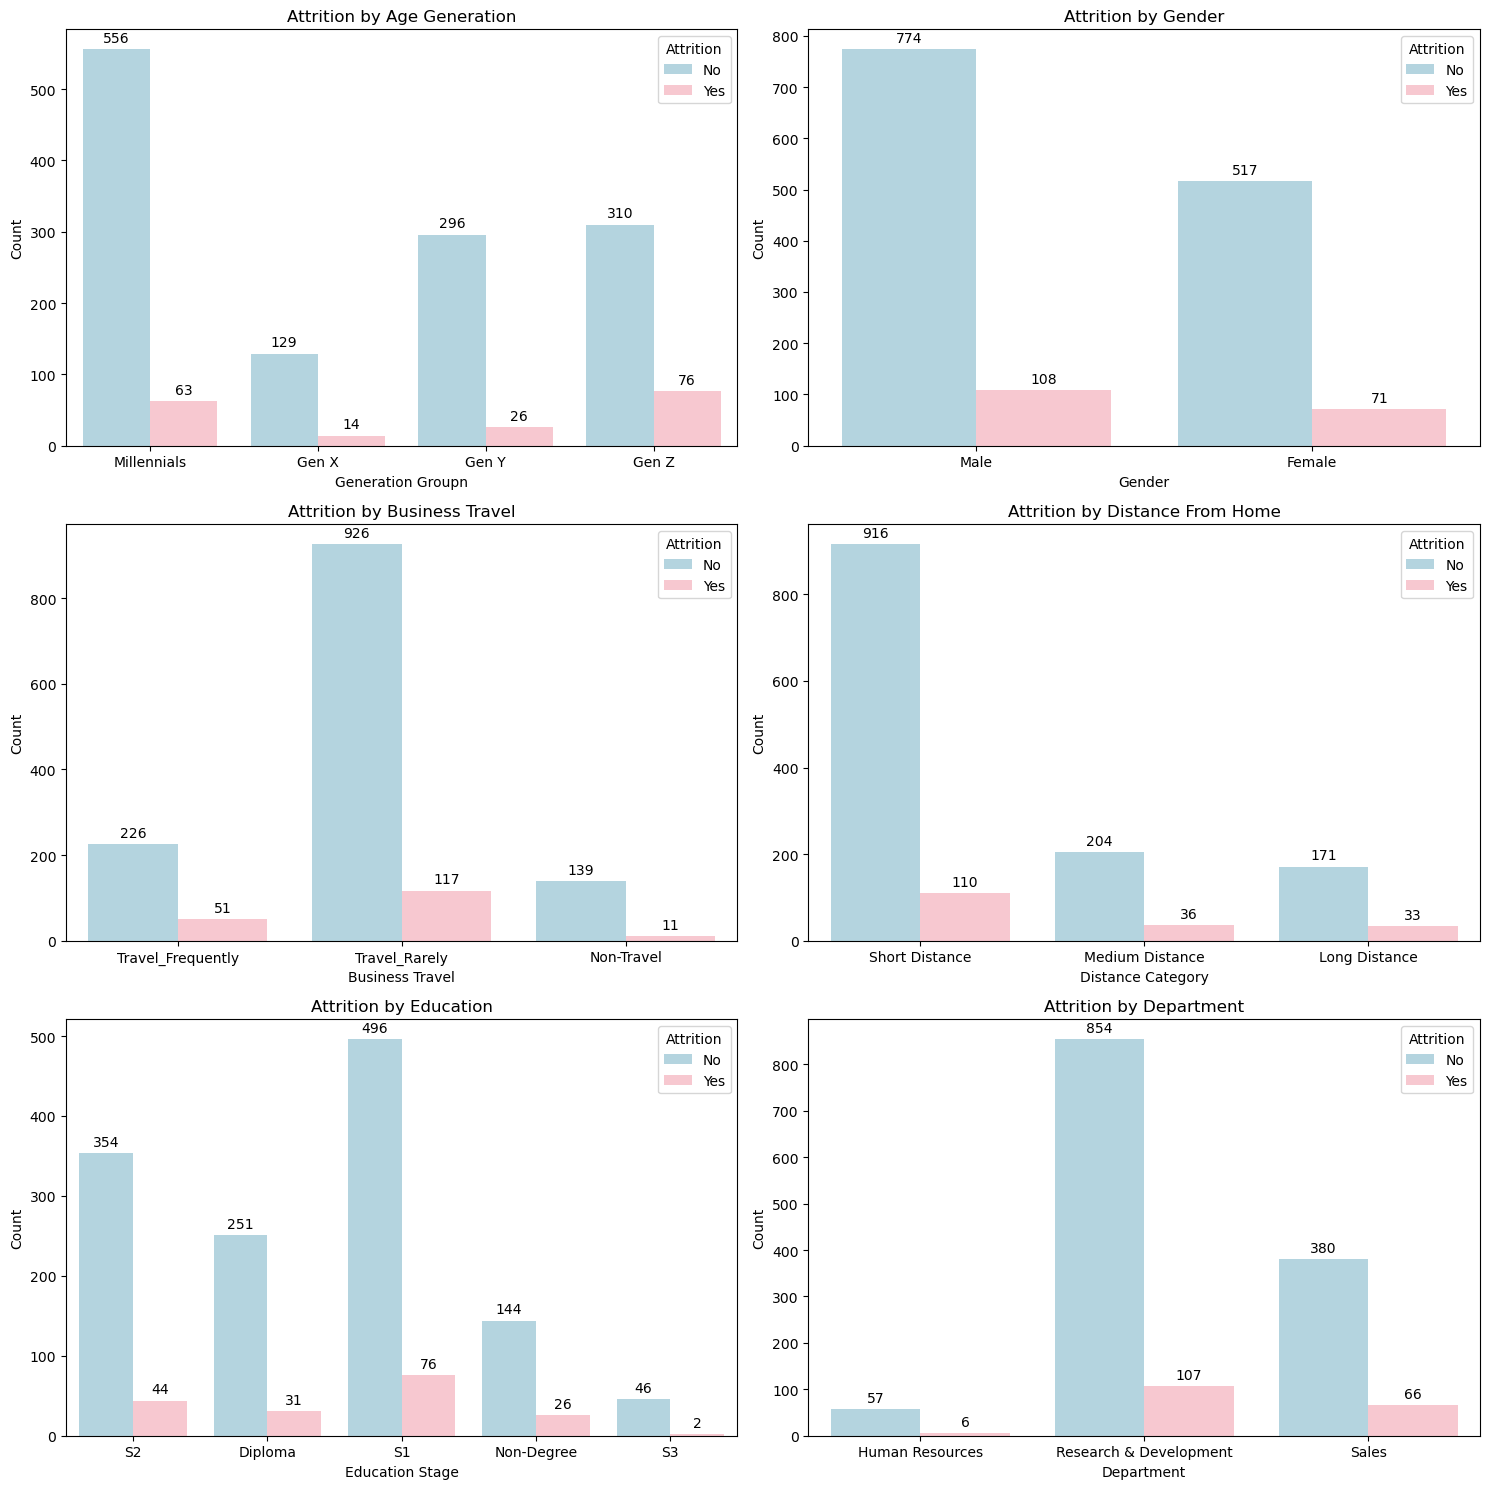

In [35]:
palette_colors = ['lightblue', 'pink']
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

plot_features = [
    ('GenerationGroup', 'Attrition by Age Generation', 'Generation Groupn'),
    ('Gender', 'Attrition by Gender', 'Gender'),
    ('BusinessTravel', 'Attrition by Business Travel', 'Business Travel'),
    ('HomeDistanceLabel', 'Attrition by Distance From Home', 'Distance Category'),
    ('Education', 'Attrition by Education', 'Education Stage'),
    ('Department', 'Attrition by Department', 'Department')
]

axs = axs.flatten()

def plot_count_with_labels(ax, feature, title, xlabel):
    sns.countplot(x=feature, hue='Attrition', data=df, palette=palette_colors, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Count")
    ax.legend(title="Attrition", loc="upper right", labels=["No", "Yes"])
    
    
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=3)

for i, (feature, title, xlabel) in enumerate(plot_features):
    plot_count_with_labels(axs[i], feature, title, xlabel)

plt.tight_layout()
plt.show()


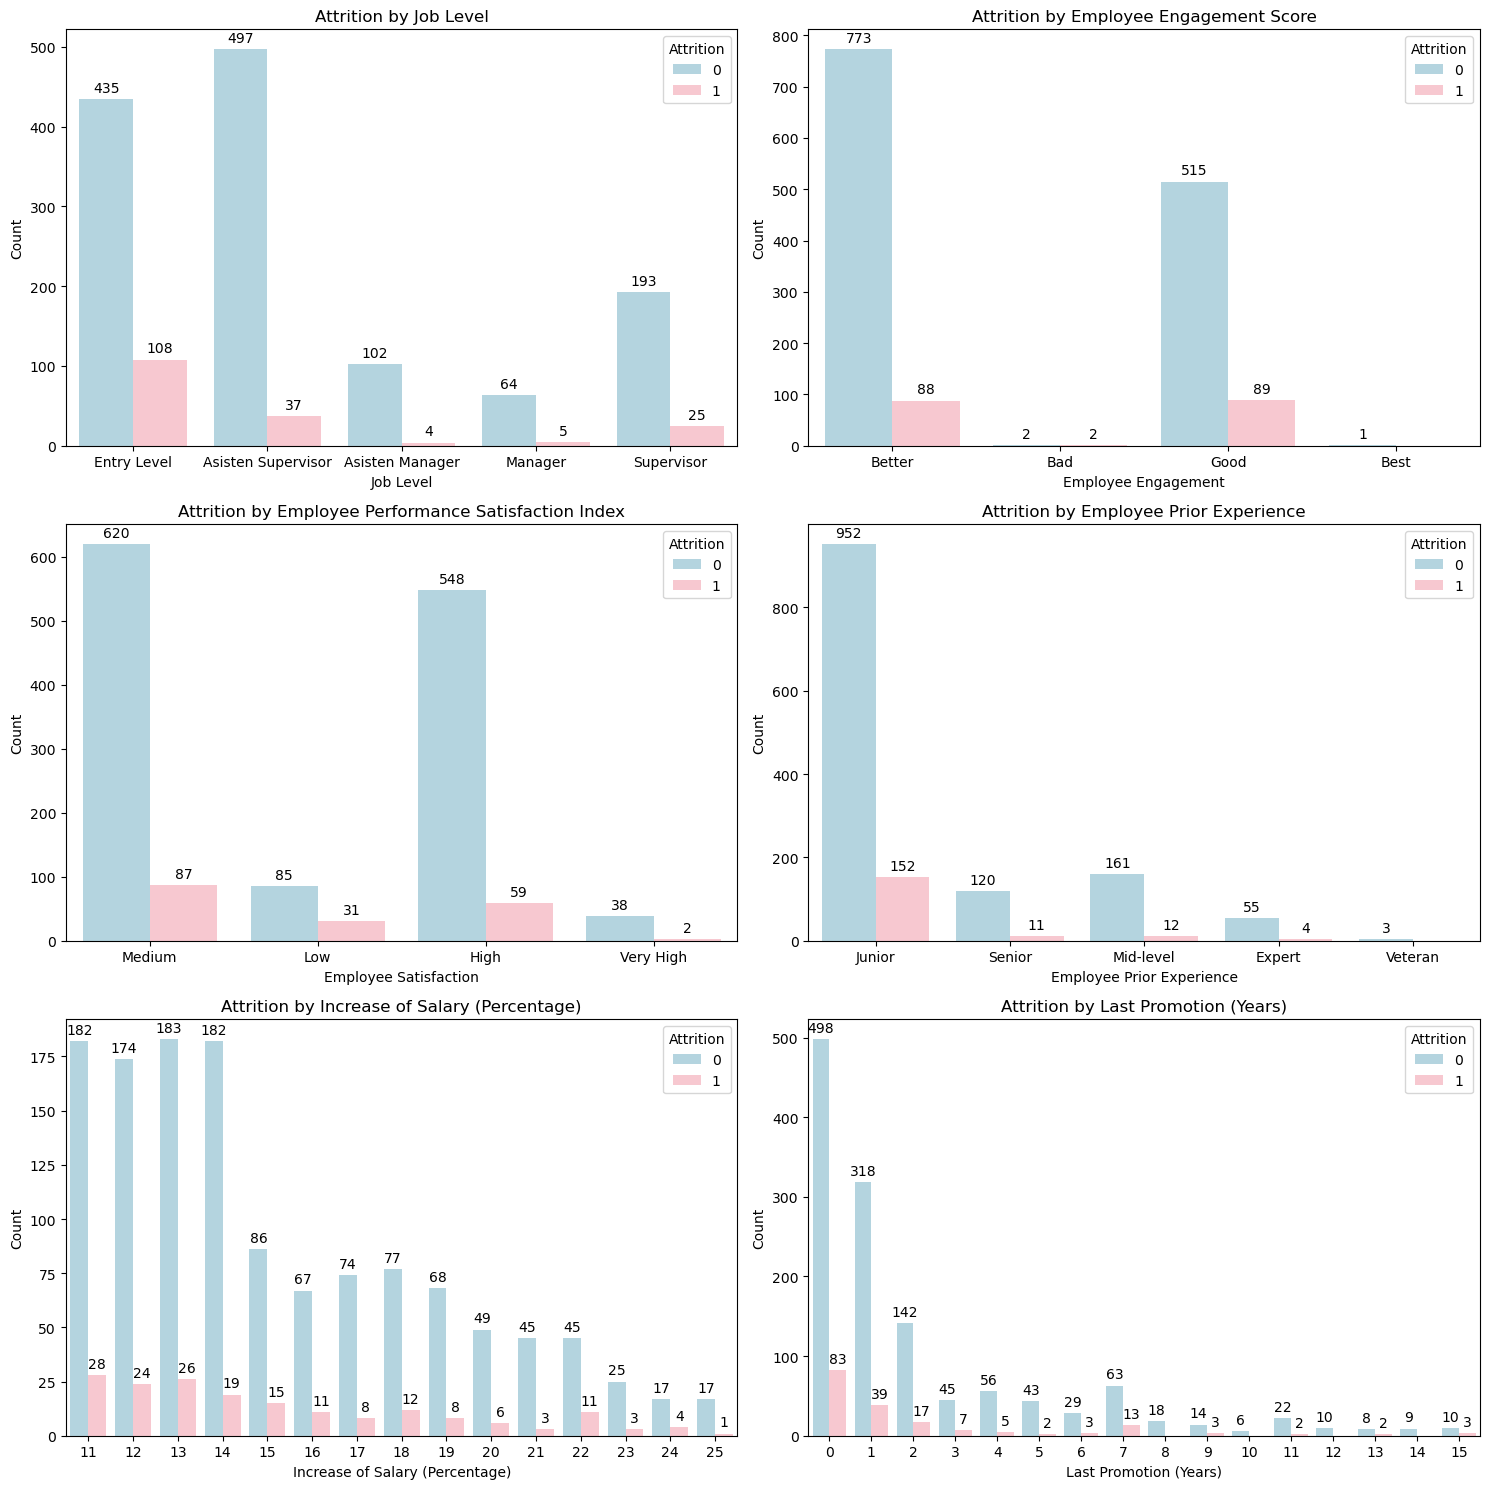

In [39]:
# Define color palette
colors = ['lightblue', 'pink']

# Buat fungsi untuk plotting
def plot_attrition(ax, x_col, title, xlabel, order=None):
    sns.countplot(x=x_col, hue='Attrition', data=df, palette=colors, ax=ax, order=order)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(str(int(p.get_height())), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 8), textcoords='offset points')

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Daftar plot dengan parameter
plots = [
    ('JobLevel', 'Attrition by Job Level', 'Job Level', axes[0, 0]),
    ('EngagementScore', 'Attrition by Employee Engagement Score', 'Employee Engagement', axes[0, 1]),
    ('PerfSatIndex', 'Attrition by Employee Performance Satisfaction Index', 'Employee Satisfaction', axes[1, 0]),
    ('ExperienceBeforeJob', 'Attrition by Employee Prior Experience', 'Employee Prior Experience', axes[1, 1]),
    ('PercentSalaryHike', 'Attrition by Increase of Salary (Percentage)', 'Increase of Salary (Percentage)', axes[2, 0]),
    ('YearsSinceLastPromotion', 'Attrition by Last Promotion (Years)', 'Last Promotion (Years)', axes[2, 1]),
]

# Buat plot
for x_col, title, xlabel, ax in plots:
    # Optional sorting untuk sumbu x jika data numerik dan ingin tampil urut
    order = sorted(df[x_col].unique()) if df[x_col].dtype != 'O' else None
    plot_attrition(ax, x_col, title, xlabel, order=order)

# Adjust layout
plt.tight_layout()
plt.show()


## Modeling

In [40]:
# Filter hanya kolom bertipe kategorikal
category_cols = df.select_dtypes(include=['object', 'category'])
category_cols.head()

,BusinessTravel,Department,Education,EducationField,EngagementScore,ExperienceBeforeJob,Gender,GenerationGroup,HomeDistanceLabel,JobLevel,JobRole,MaritalStatus,OverTime,PerfSatIndex
0,Travel_Frequently,Human Resources,S2,Other,Better,Junior,Male,Millennials,Short Distance,Entry Level,Human Resources,Married,Yes,Medium
1,Travel_Rarely,Research & Development,Diploma,Medical,Bad,Senior,Female,Millennials,Medium Distance,Asisten Supervisor,Healthcare Representative,Married,No,Low
2,Travel_Rarely,Research & Development,S2,Life Sciences,Better,Mid-level,Male,Gen X,Short Distance,Entry Level,Research Scientist,Married,Yes,Medium
3,Travel_Frequently,Sales,S1,Marketing,Better,Junior,Female,Gen Y,Long Distance,Asisten Manager,Sales Executive,Married,No,High
4,Travel_Rarely,Research & Development,S2,Medical,Better,Senior,Female,Millennials,Short Distance,Entry Level,Research Scientist,Married,No,Medium


In [41]:
category_cols.nunique()

BusinessTravel         3
Department             3
Education              5
EducationField         6
EngagementScore        4
ExperienceBeforeJob    5
Gender                 2
GenerationGroup        4
HomeDistanceLabel      3
JobLevel               5
JobRole                9
MaritalStatus          3
OverTime               2
PerfSatIndex           4
dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns_to_encode = ['Attrition', 'OverTime', 'GenerationGroup', 'BusinessTravel', 'Department', 
                     'HomeDistanceLabel', 'Education', 'EducationField', 'EngagementScore', 
                     'MaritalStatus', 'ExperienceBeforeJob', 'JobLevel', 'JobRole', 
                     'Gender', 'PerfSatIndex']

for col in columns_to_encode:
    df[col] = df[col].apply(lambda x: label_encoder.fit(df[col]).transform([x])[0])


In [43]:
# Drop specific columns from the DataFrame
columns_to_drop = ['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
emp_df = df.drop(columns=columns_to_drop)

# Display first few rows
emp_df.head()

,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeId,EngagementScore,ExperienceBeforeJob,Gender,...,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerfSatIndex,StockOptionLevel,TrainingTimesLastYear
0,0,1,1444,0,3,4,1,2,1,1,...,1,1,2991,5224,0,1,11,2,1,2
1,1,2,1141,1,0,3,2,0,3,0,...,0,1,4777,14382,5,0,15,1,0,2
2,1,2,1323,1,3,1,3,2,2,1,...,6,1,2461,10332,9,1,12,2,3,2
3,0,1,555,2,2,2,4,2,1,0,...,7,1,13525,14864,5,0,14,0,1,2
4,0,2,1194,1,3,3,5,2,3,0,...,6,1,2001,12549,2,0,14,2,3,2


In [ ]:
X = emp_df.loc[:, emp_df.columns != 'Attrition'].values
y = emp_df['Attrition'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1176, 23)
Testing data shape: (294, 23)


In [46]:
scaler = StandardScaler()

X_train = scaler.fit(X_train).transform(X_train)

X_test = scaler.transform(X_test)

### Logistic Regression Classifier

In [47]:
# Initialize Logistic Regression classifier
log_reg = LogisticRegression()

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 150, 200, 300],
    'multi_class': ['auto'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

# Setup GridSearchCV with cross-validation
grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train, y_train)

# Predicting the target variable for test data
predictions_lr = grid_search_lr.predict(X_test)

# Output the best hyperparameters from the grid search
print("Optimal hyperparameters:", grid_search_lr.best_params_)

# Evaluate and print the accuracy on the test set
accuracy_lr = accuracy_score(y_test, predictions_lr)
print(f"Logistic Regression test accuracy: {accuracy_lr}")


Optimal hyperparameters: {'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'solver': 'lbfgs'}
Logistic Regression test accuracy: 0.8945578231292517


c:\Users\HP\anaconda3\envs\hr-analysis\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Random Forest

In [48]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

# Setup GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit the model with training data
grid_search_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = grid_search_rf.predict(X_test)

# Output the best parameters found
print("Best hyperparameters:", grid_search_rf.best_params_)

# Calculate accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"Test accuracy of Random Forest Classifier: {accuracy_rf}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 100}
Test accuracy of Random Forest Classifier: 0.8877551020408163


### Gradient Boosting

In [49]:
# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Setup GridSearchCV for hyperparameter tuning
grid_search_gb = GridSearchCV(
    estimator=gb_classifier,
    param_grid=gb_param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the model to the training data
grid_search_gb.fit(X_train, y_train)

# Generate predictions on the test data
predictions_gb = grid_search_gb.predict(X_test)

# Output the best hyperparameters found
print("Best hyperparameters:", grid_search_gb.best_params_)

# Calculate and print the accuracy of the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, predictions_gb)
print(f"Test accuracy of Gradient Boosting Classifier: {accuracy_gb}")

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Test accuracy of Gradient Boosting Classifier: 0.8809523809523809


### Decision Tree

In [50]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the grid for hyperparameters
dt_param_grid = {
    'min_samples_leaf': [1, 10, 100],
    'max_depth': [1, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(
    estimator=dt_classifier,
    param_grid=dt_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit the Decision Tree model to the training data
grid_search_dt.fit(X_train, y_train)

# Predict on the test data
dt_predictions = grid_search_dt.predict(X_test)

# Print the best parameters from the grid search
print("Best hyperparameters:", grid_search_dt.best_params_)

# Calculate and display the accuracy of the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Test accuracy of Decision Tree Classifier: {dt_accuracy}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
Test accuracy of Decision Tree Classifier: 0.891156462585034


### SVM

In [51]:
# Initialize SVM
svm_classifier = SVC(probability=True)

# Define a parameter grid for hyperparameter tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale']
}

# Set up GridSearchCV for hyperparameter optimization
svm_grid_search = GridSearchCV(
    estimator=svm_classifier,
    param_grid=svm_param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the SVM model to the training data
svm_grid_search.fit(X_train, y_train)

# Predict using the trained SVM model
svm_predictions = svm_grid_search.predict(X_test)

# Display the best hyperparameters from the grid search
print("Optimal hyperparameters:", svm_grid_search.best_params_)

# Calculate and output the accuracy of the SVM model on the test set
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Test accuracy of Support Vector Machine (SVM) Classifier: {svm_accuracy}")


Optimal hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Test accuracy of Support Vector Machine (SVM) Classifier: 0.891156462585034


### Naive Bayes

In [52]:
# Initialize the Naive Bayes classifier instance
nb_classifier = GaussianNB()

# Set the hyperparameter grid
param_options = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [None, [0.1, 0.9], [0.5, 0.5]]
}

# Initialize GridSearchCV for model tuning
grid_search_nb = GridSearchCV(
    estimator=nb_classifier,
    param_grid=param_options,
    cv=5,
    scoring='accuracy'
)

# Fit the model using the training data
grid_search_result = grid_search_nb.fit(X_train, y_train)

# Make predictions on the test dataset
predictions = grid_search_result.predict(X_test)

# Display the best hyperparameters found through GridSearchCV
print(f"Best hyperparameters: {grid_search_result.best_params_}")

# Evaluate the model accuracy on the test set
test_accuracy_score = accuracy_score(y_test, predictions)
print(f"Test accuracy of Gaussian Naive Bayes classifier: {test_accuracy_score}")


Best hyperparameters: {'priors': None, 'var_smoothing': 1e-09}
Test accuracy of Gaussian Naive Bayes classifier: 0.8707482993197279


## Evaluation

### Logistic Regression

In [54]:
# Generate the confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, predictions_lr)

# Display the confusion matrix
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_lr)


Logistic Regression Confusion Matrix:
[[259   3]
 [ 28   4]]


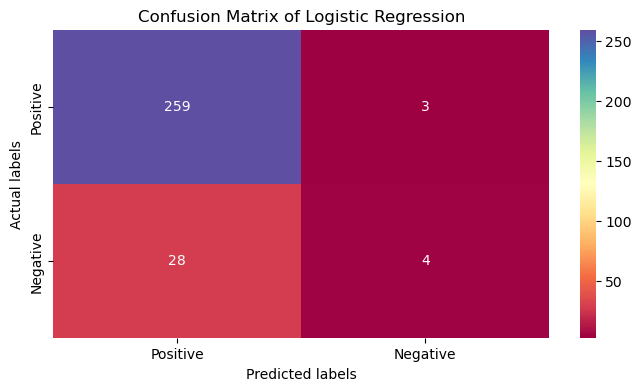

In [63]:
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Spectral', fmt='g',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [66]:
print("The Classification Report of Logistic Regression")
print(classification_report(y_test, predictions_lr))

The Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       262
           1       0.57      0.12      0.21        32

    accuracy                           0.89       294
   macro avg       0.74      0.56      0.57       294
weighted avg       0.87      0.89      0.86       294



### Random Forest

In [ ]:
# Menghitung confusion matrix dari hasil prediksi
conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=predictions_lr)

# Menampilkan hasil confusion matrix
print("Confusion Matrix of Random Forest Classifier:")
print(conf_matrix_rf)

Confusion Matrix of Random Forest Classifier:
[[259   3]
 [ 28   4]]


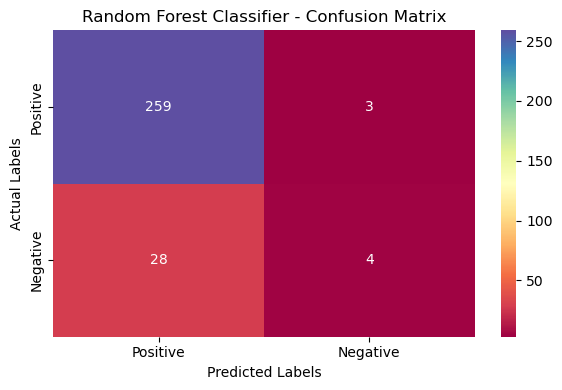

In [69]:
# Menampilkan heatmap dari confusion matrix Random Forest
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Spectral', fmt='d',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'],
            ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Random Forest Classifier - Confusion Matrix')
plt.tight_layout()
plt.show()


In [70]:
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, predictions_lr))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       262
           1       0.57      0.12      0.21        32

    accuracy                           0.89       294
   macro avg       0.74      0.56      0.57       294
weighted avg       0.87      0.89      0.86       294



### Gradient Boosting

In [ ]:
# Menghitung confusion matrix untuk model Gradient Boosting
conf_matrix_gb = confusion_matrix(y_true=y_test, y_pred=predictions_lr)

# Menampilkan confusion matrix
print("Confusion Matrix for Gradient Boosting Classifier:")
print(conf_matrix_gb)

Confusion Matrix for Gradient Boosting Classifier:
[[259   3]
 [ 28   4]]


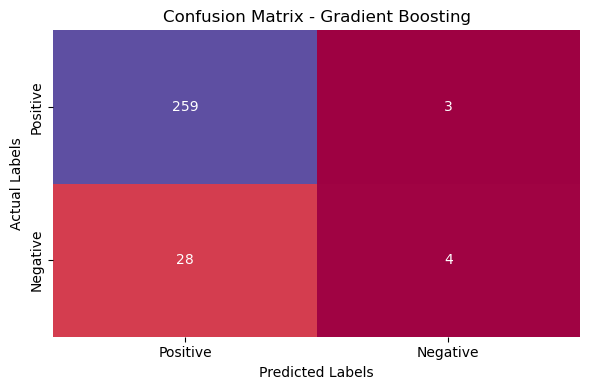

In [72]:
# Visualisasi confusion matrix untuk Gradient Boosting menggunakan seaborn
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='g', cmap='Spectral',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'],
            cbar=False, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix - Gradient Boosting')
plt.tight_layout()
plt.show()


In [73]:
print("The Classification Report of Gradient Boosting Classifier")
print(classification_report(y_test, predictions_lr))

The Classification Report of Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       262
           1       0.57      0.12      0.21        32

    accuracy                           0.89       294
   macro avg       0.74      0.56      0.57       294
weighted avg       0.87      0.89      0.86       294



### SVM

In [74]:
# Membuat confusion matrix untuk klasifikasi SVM
conf_matrix_svm = confusion_matrix(y_true=y_test, y_pred=predictions_lr)

# Menampilkan hasil confusion matrix
print("Confusion Matrix for SVM Classifier:")
print(conf_matrix_svm)

Confusion Matrix for SVM Classifier:
[[259   3]
 [ 28   4]]


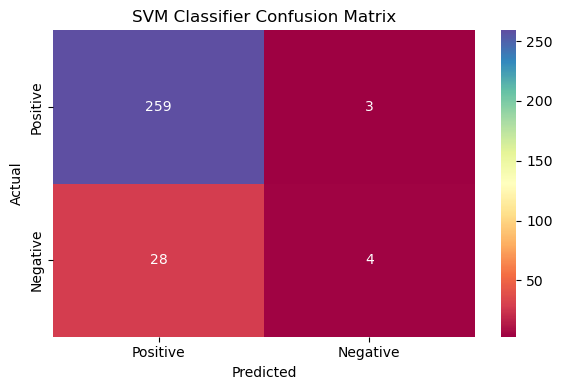

In [75]:
# Visualisasi confusion matrix untuk SVM dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data=conf_matrix_svm, annot=True, fmt='g', cmap='Spectral',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.title('SVM Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [76]:
# Menampilkan classification report untuk model SVM
report_svm = classification_report(y_true=y_test, y_pred=predictions_lr, zero_division=1)
print("Classification Report untuk SVM Classifier:")
print(report_svm)

Classification Report untuk SVM Classifier:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       262
           1       0.57      0.12      0.21        32

    accuracy                           0.89       294
   macro avg       0.74      0.56      0.57       294
weighted avg       0.87      0.89      0.86       294



### Naive Bayes

In [77]:
# Membuat confusion matrix untuk Gaussian Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, predictions_lr)
print("Hasil Confusion Matrix dari Gaussian Naive Bayes:")
print(nb_conf_matrix)

Hasil Confusion Matrix dari Gaussian Naive Bayes:
[[259   3]
 [ 28   4]]


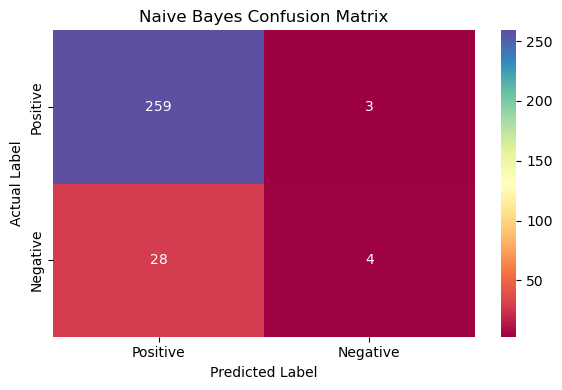

In [78]:
# Visualisasi Confusion Matrix Naive Bayes menggunakan heatmap
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(data=nb_conf_matrix, annot=True, fmt='g', cmap='Spectral',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'], ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Naive Bayes Confusion Matrix')
plt.tight_layout()
plt.show()


In [79]:
# Tampilkan classification report untuk Naive Bayes Classifier
report_nb = classification_report(y_test, predictions_lr)
print("Classification Report (Naive Bayes Classifier):")
print(report_nb)

Classification Report (Naive Bayes Classifier):
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       262
           1       0.57      0.12      0.21        32

    accuracy                           0.89       294
   macro avg       0.74      0.56      0.57       294
weighted avg       0.87      0.89      0.86       294



## Deployment

In [80]:
# Save the model with joblib
model_path = 'random_forest_model.joblib'
joblib.dump(grid_search_rf, model_path)

['random_forest_model.joblib']